In [23]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame

import matplotlib.pyplot as plt                     # Basic visualisation
import seaborn as sns                               # Advanced data visualisation

from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

The data provided contains information about individual study results for mathematics, together with demographic information about the student.
Solve each subquest in one cell. Show, if applicable, at the end of each cell first 5 lines of your last result (s).

In [24]:
demographic = pd.read_csv('https://raw.githubusercontent.com/jdecorte/machinelearning/main/datasets/demographic.csv')
demographic.head()

,StudentID,gender,race/ethnicity,parental level of education
0,0,female,group B,bachelor's degree
1,1,female,group C,some college
2,2,female,group B,master's degree
3,3,male,group A,associate's degree
4,4,male,group C,some college


Show some general info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   StudentID                    1000 non-null   int64 
 1   gender                       1000 non-null   object
 2   race/ethnicity               1000 non-null   object
 3   parental level of education  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


Read in the dataset studentscore.csv

In [26]:
student = pd.read_csv('https://raw.githubusercontent.com/jdecorte/machinelearning/main/datasets/studentscore.csv')
student.head()

,StudentID,lunch,test preparation course,math score
0,0,standard,none,72
1,1,standard,completed,69
2,2,standard,none,90
3,3,free/reduced,none,47
4,4,standard,none,76


Show some general info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   StudentID                    1000 non-null   int64 
 1   gender                       1000 non-null   object
 2   race/ethnicity               1000 non-null   object
 3   parental level of education  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


Merge both data frames so that you have one line left per student.  
We are doing an **inner** join on student and demographic, using the column StudentID.

,StudentID,lunch,test preparation course,math score,gender,race/ethnicity,parental level of education
0,0,standard,none,72,female,group B,bachelor's degree
1,1,standard,completed,69,female,group C,some college
2,2,standard,none,90,female,group B,master's degree
3,3,free/reduced,none,47,male,group A,associate's degree
4,4,standard,none,76,male,group C,some college


Remove all lines that contain empty fields in some columns.

,StudentID,lunch,test preparation course,math score,gender,race/ethnicity,parental level of education
0,0,standard,none,72,female,group B,bachelor's degree
1,1,standard,completed,69,female,group C,some college
2,2,standard,none,90,female,group B,master's degree
3,3,free/reduced,none,47,male,group A,associate's degree
4,4,standard,none,76,male,group C,some college


What are the unique values of luch, test preparation course, gender, race/ethnicity and parental level of education?

standard        645
free/reduced    355
Name: lunch, dtype: int64

none         642
completed    358
Name: test preparation course, dtype: int64

female    518
male      482
Name: gender, dtype: int64

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

Replace the textual values of 'lunch', 'test preparation course' and 'gender' by numeric values 0 and 1.

,StudentID,lunch,test preparation course,math score,gender,race/ethnicity,parental level of education
0,0,0,0,72,1,group B,bachelor's degree
1,1,0,1,69,1,group C,some college
2,2,0,0,90,1,group B,master's degree
3,3,1,0,47,0,group A,associate's degree
4,4,0,0,76,0,group C,some college



Later on we will make a prediction model for the 'math score'. Remove the column or columns that are not relevant for this purpose.


,lunch,test preparation course,math score,gender,race/ethnicity,parental level of education
0,0,0,72,1,group B,bachelor's degree
1,0,1,69,1,group C,some college
2,0,0,90,1,group B,master's degree
3,1,0,47,0,group A,associate's degree
4,0,0,76,0,group C,some college


What is X and what is y?

What is X_train, y_train, X_test, y_test?

What is the shape of X_train, y_train, X_test and y_test?

(750, 5) (250, 5) (750,) (250,)


What are the columns containing numbers?

Index(['lunch', 'test preparation course', 'gender'], dtype='object')


What are the columns containing text?

Index(['race/ethnicity', 'parental level of education'], dtype='object')


Define the ColumnTransformer for applying OneHotEncoder on both categorical columns.  
Why is one-hot-encoding preferable over numeric values in this case?
Set remainder='passthrough' to ensure that all columns not specified in the list of "transformers" will be passed through without transformation, instead of being dropped.

The dictionary below consists of the model Linear SVM Regression.  
Add a model for SVM Regression, using a 2nd-degree polynomial kernel.

In [1]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

regressors = {
    "svm_reg": LinearSVR(epsilon=1.5, random_state=42)
}

For each of both models: 
* Define the data preparation and modeling pipeline
* Train the model
* What is the accuracy of the model, expressed as MAE? Use K-fold cross-validation with k = 3.

svm_reg --> mae = 11.043956032438077  
svm_poly_reg --> mae = 11.406481743196977

svm_reg --> mae = 11.043956032438077
svm_poly_reg --> mae = 11.406481743196977


In the example below is shown, how you can use GridSearchCV to find the best value for parameter epsilon for the linear model

In [50]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

svr_params = {'epsilon': [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]}
grid_svc = GridSearchCV(LinearSVR(random_state=42), svr_params, scoring='neg_mean_absolute_error', cv=3)
pipeline = Pipeline([('prep',col_transform), ('grid_svc', grid_svc)])
pipeline.fit(X_train, y_train)

# best estimator
print(f"best estimator = {grid_svc.best_estimator_}")
# best score
print(f"best score = {grid_svc.best_score_}")


best estimator = LinearSVR(epsilon=3.0, random_state=42)
best score = -11.015022781135555


We'd like to know the scores for each of the values of epsilon.  
Make sure you understand the example code: use .cv_results_  to get all the results

{'mean_fit_time': array([0.0016861 , 0.00099905, 0.00099627, 0.00131663, 0.00132751,
       0.00134309, 0.00134389, 0.00131083]), 'std_fit_time': array([4.86060857e-04, 9.36094483e-06, 2.48026634e-06, 4.56164232e-04,
       4.67661593e-04, 4.65955808e-04, 4.87276574e-04, 4.52349395e-04]), 'mean_score_time': array([0.00033832, 0.00066058, 0.00034324, 0.00067798, 0.        ,
       0.00032075, 0.0003345 , 0.00033259]), 'std_score_time': array([0.00047845, 0.0009342 , 0.00048542, 0.00047961, 0.        ,
       0.00045361, 0.00047306, 0.00047036]), 'param_epsilon': masked_array(data=[0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'epsilon': 0.1}, {'epsilon': 0.5}, {'epsilon': 1.0}, {'epsilon': 1.5}, {'epsilon': 2.0}, {'epsilon': 2.5}, {'epsilon': 3.0}, {'epsilon': 3.5}], 'split0_test_score': array([-11.35864788, -11.28210227, -11.24218238, -11.15012043,
      

Make the following overview using results  
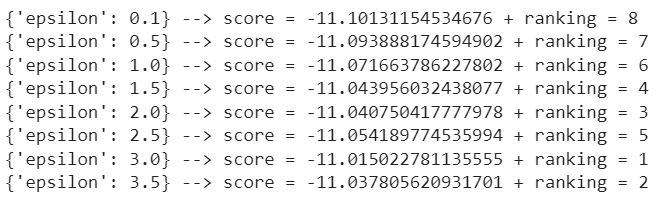

{'epsilon': 0.1} --> score = -11.10131154534676 + ranking = 8
{'epsilon': 0.5} --> score = -11.093888174594902 + ranking = 7
{'epsilon': 1.0} --> score = -11.071663786227802 + ranking = 6
{'epsilon': 1.5} --> score = -11.043956032438077 + ranking = 4
{'epsilon': 2.0} --> score = -11.040750417777978 + ranking = 3
{'epsilon': 2.5} --> score = -11.054189774535994 + ranking = 5
{'epsilon': 3.0} --> score = -11.015022781135555 + ranking = 1
{'epsilon': 3.5} --> score = -11.037805620931701 + ranking = 2


Use GridSearchCV to find the best parameters for this non-linear regression task with little regularization (C is a large value)
* epsilon = 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5 
* kernel' = 'rbf', 'poly', 'sigmoid', 'linear'
* degree = [1, 2, 3]




Make the following overview

Best index = 25  
Best score = -10.636710047538656  
Best model = {'degree': 1, 'epsilon': 3.0, 'kernel': 'poly'}

Best index = 25
Best score = -10.636710047538656
Best model = {'degree': 1, 'epsilon': 3.0, 'kernel': 'poly'}


Make the following overview

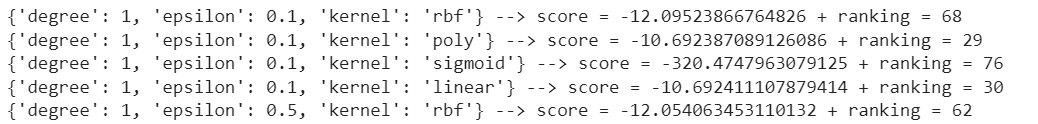

{'degree': 1, 'epsilon': 0.1, 'kernel': 'rbf'} --> score = -12.09523866764826 + ranking = 68
{'degree': 1, 'epsilon': 0.1, 'kernel': 'poly'} --> score = -10.692387089126086 + ranking = 29
{'degree': 1, 'epsilon': 0.1, 'kernel': 'sigmoid'} --> score = -320.47479630791247 + ranking = 76
{'degree': 1, 'epsilon': 0.1, 'kernel': 'linear'} --> score = -10.692411107879414 + ranking = 30
{'degree': 1, 'epsilon': 0.5, 'kernel': 'rbf'} --> score = -12.054063453110132 + ranking = 62
{'degree': 1, 'epsilon': 0.5, 'kernel': 'poly'} --> score = -10.68214811184981 + ranking = 24
{'degree': 1, 'epsilon': 0.5, 'kernel': 'sigmoid'} --> score = -324.6229016331346 + ranking = 79
{'degree': 1, 'epsilon': 0.5, 'kernel': 'linear'} --> score = -10.682131953072908 + ranking = 21
{'degree': 1, 'epsilon': 1.0, 'kernel': 'rbf'} --> score = -11.995922652557699 + ranking = 56
{'degree': 1, 'epsilon': 1.0, 'kernel': 'poly'} --> score = -10.674794404293737 + ranking = 20
{'degree': 1, 'epsilon': 1.0, 'kernel': 'sigmo